## P3: Classifying Sounds

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import time

In [13]:
SAMPLE_RATE = 22050

In [69]:
cl = np.array(['air_conditioner','car_horn','children_playing','dog_bark','drilling',
               'engine_idling','gun_shot','jackhammer','siren','street_music'])

In [3]:
# Prototyping
df_iter = iter(pd.read_csv('../train.csv', chunksize=10))
df = next(df_iter)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 88201 entries, -4.662734270095825195e-02 to 5.000000000000000000e+00
dtypes: float64(88201)
memory usage: 6.7 MB


In [5]:
df.shape

(10, 88201)

## Create Spectrograms

In [8]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [9]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

In [125]:
icl0 = 6  #Find gun shots
n_icl = 0
n_iter = 0
while n_icl == 0:
    n_iter += 1
    print('n_iter: ' , n_iter)
    df = next(df_iter)
    X_train = df.values[:,:-1]
    N_train = X_train.shape[0]
    y_train = df.values[:,-1].reshape(N_train,1).astype(int)
    icl = (y_train == icl0)
    n_icl = np.sum(icl)
print('n_icl: ', n_icl)    
# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0]
test_spec = mel_spec(song)
print(test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

n_iter:  1
n_iter:  2
n_iter:  3
n_iter:  4
n_iter:  5
n_iter:  6
n_iter:  7
n_iter:  8
n_iter:  9
n_iter:  10
n_iter:  11
n_iter:  12
n_iter:  13
n_iter:  14
n_iter:  15
n_iter:  16
n_iter:  17
n_iter:  18
n_iter:  19
n_iter:  20
n_iter:  21
n_iter:  22
n_iter:  23
n_iter:  24
n_iter:  25
n_iter:  26
n_iter:  27
n_iter:  28
n_iter:  29
n_iter:  30
n_iter:  31
n_iter:  32
n_iter:  33
n_icl:  1
(168, 173)


/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [126]:
X_train = X_train[icl[:,0]]
N_train = X_train.shape[0]
y_train = y_train[icl[:,0]]

In [127]:
tmp_train = np.zeros((N_train,FEATS,FRAMES))
for i in range(N_train):
    tmp_train[i,:,:] = mel_spec(X_train[i])
#np.save('Data/xtrain_spec', tmp_train)

/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


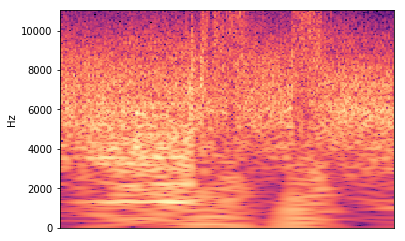

In [129]:
i=0
librosa.display.specshow(tmp_train[i], y_axis='hz')
plt.show()

In [130]:
print(cl[y_train[i,0]])
ipd.Audio(X_train[i], rate=SAMPLE_RATE)

gun_shot


In [160]:
# Spectrograms of full training set
chunksize = 500
n_chunks = 0
time0 = time.clock()
for df in pd.read_csv('../train.csv.gz', chunksize=chunksize):
    n_chunks += 1
    print('Chunk #',n_chunks,':')
    X_train0 = df.values[:,:-1]
    y_train0 = df.values[:,-1].reshape(-1,1).astype(int)
    X_train1 = np.array([mel_spec(X_train0_) for X_train0_ in X_train0])
    X_train = X_train1 if n_chunks==1 else np.vstack((X_train, X_train1))
    y_train = y_train0 if n_chunks==1 else np.vstack((y_train, y_train0))
    print('   So far: {} samples, {:.2f} min'.format(X_train.shape[0], (time.clock()-time0)/60))
print('DONE with training dataset', X_train.shape, y_train.shape)
N_train = X_train.shape[0]
del df, X_train0, y_train0, X_train1

Chunk # 1 :


/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


   So far: 500 samples, 2.89 min
Chunk # 2 :
   So far: 1000 samples, 5.79 min
Chunk # 3 :
   So far: 1500 samples, 8.68 min
Chunk # 4 :
   So far: 2000 samples, 11.52 min
Chunk # 5 :
   So far: 2500 samples, 14.44 min
Chunk # 6 :
   So far: 3000 samples, 17.35 min
Chunk # 7 :
   So far: 3500 samples, 20.29 min
Chunk # 8 :
   So far: 4000 samples, 23.15 min
Chunk # 9 :
   So far: 4500 samples, 26.07 min
Chunk # 10 :
   So far: 5000 samples, 28.92 min
Chunk # 11 :
   So far: 5500 samples, 31.79 min
Chunk # 12 :
   So far: 6000 samples, 34.87 min
Chunk # 13 :
   So far: 6324 samples, 36.78 min
DONE with training dataset (6324, 168, 173) (6324, 1)


In [158]:
# Spectrograms of full test set
chunksize = 200
n_chunks = 0
time0 = time.clock()
for df in pd.read_csv('../test.csv.gz', header=None, index_col=0, chunksize=chunksize):
    n_chunks += 1
    print('Chunk #',n_chunks,':')
    X_test0 = df.values
    id_test0 = df.index.values.reshape(-1,1).astype(int)
    X_test1 = np.array([mel_spec(X_test0_) for X_test0_ in X_test0])
    X_test = X_test1 if n_chunks==1 else np.vstack((X_test, X_test1))
    id_test = id_test0 if n_chunks==1 else np.vstack((id_test, id_test0))
    print('   So far: {} samples, {:.2f} min'.format(X_test.shape[0], (time.clock()-time0)/60))
print('DONE with test dataset', X_test.shape, id_test.shape)
del df, X_test0, id_test0, X_test1

Chunk # 1 :


/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


   So far: 200 samples, 1.09 min
Chunk # 2 :
   So far: 400 samples, 2.22 min
Chunk # 3 :
   So far: 600 samples, 3.31 min
Chunk # 4 :
   So far: 800 samples, 4.41 min
Chunk # 5 :
   So far: 1000 samples, 5.51 min
DONE with test dataset (1000, 168, 173) (1000, 1)


## Mel Frequency Cepstral Coefficients (MFCCs)

(168, 173)
children_playing


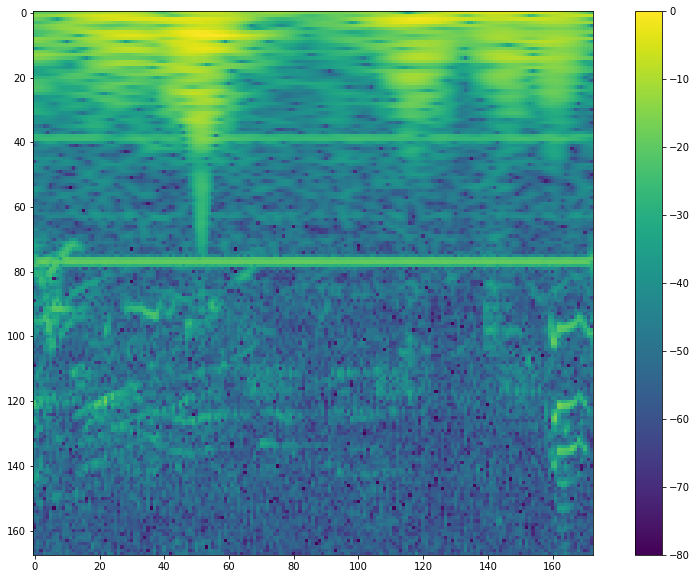

In [264]:
i=10
print(X_train[i].shape)
print(cl[y_train[i,0]])
plt.figure(figsize=(15,10))
plt.imshow(X_train[i])
plt.colorbar()
plt.show()

(12, 173)


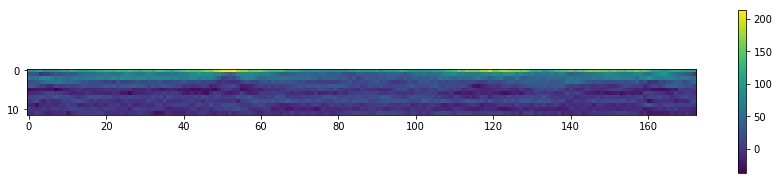

In [265]:
mfcc = librosa.feature.mfcc(S=X_train[i],n_mfcc=20)[1:13]
print(mfcc.shape)
plt.figure(figsize=(15,3))
plt.imshow(mfcc)
plt.colorbar()
plt.show()

(12, 173)


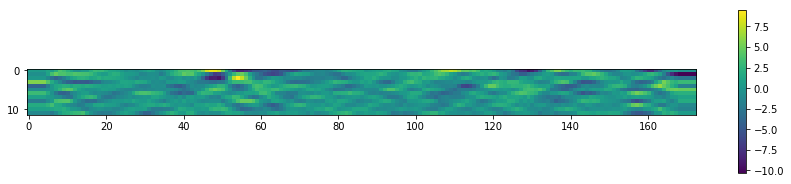

In [266]:
mfcc_delta = librosa.feature.delta(mfcc, width=9, order=1)  # Try different widths
print(mfcc_delta.shape)
plt.figure(figsize=(15,3))
plt.imshow(mfcc_delta)
plt.colorbar()
plt.show()

(12, 173)


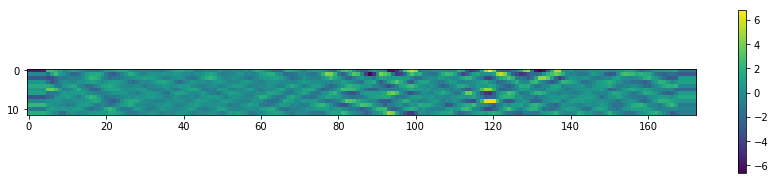

In [263]:
mfcc_delta2 = librosa.feature.delta(mfcc, width=9, order=2) # Try different widths
print(mfcc_delta2.shape)
plt.figure(figsize=(15,3))
plt.imshow(mfcc_delta2)
plt.colorbar()
plt.show()

In [310]:
# MFCCs, delta and delta-delta for whole training set
n_mfcc = 20
X_train_mfcc = np.array([librosa.feature.mfcc(S=X_train0,n_mfcc=n_mfcc)[1:] for X_train0 in X_train])
X_train_mfcc_delta  = np.array([librosa.feature.delta(X_train_mfcc0,width=9,order=1) for X_train_mfcc0 in X_train_mfcc])
X_train_mfcc_delta2 = np.array([librosa.feature.delta(X_train_mfcc0,width=9,order=2) for X_train_mfcc0 in X_train_mfcc])
print(X_train_mfcc.shape, X_train_mfcc_delta.shape, X_train_mfcc_delta2.shape)

(6324, 19, 173) (6324, 19, 173) (6324, 19, 173)


In [311]:
X_train1 = np.hstack((X_train_mfcc,X_train_mfcc_delta,X_train_mfcc_delta2))
del X_train_mfcc, X_train_mfcc_delta, X_train_mfcc_delta2
print(X_train1.shape)

(6324, 57, 173)


In [312]:
# MFCCs, delta and delta-delta for whole test set
X_test_mfcc = np.array([librosa.feature.mfcc(S=X_test0,n_mfcc=n_mfcc)[1:] for X_test0 in X_test])
X_test_mfcc_delta  = np.array([librosa.feature.delta(X_test_mfcc0,width=9,order=1) for X_test_mfcc0 in X_test_mfcc])
X_test_mfcc_delta2 = np.array([librosa.feature.delta(X_test_mfcc0,width=9,order=2) for X_test_mfcc0 in X_test_mfcc])
print(X_test_mfcc.shape, X_test_mfcc_delta.shape, X_test_mfcc_delta2.shape)

(1000, 19, 173) (1000, 19, 173) (1000, 19, 173)


In [313]:
X_test1 = np.hstack((X_test_mfcc,X_test_mfcc_delta,X_test_mfcc_delta2))
del X_test_mfcc, X_test_mfcc_delta, X_test_mfcc_delta2
print(X_test1.shape)

(1000, 57, 173)


In [314]:
# Flatten arrays
X_train1 = np.array([X_train0.flatten() for X_train0 in X_train1])
X_test1  = np.array([X_test0.flatten()  for X_test0  in X_test1])
print(X_train1.shape, X_test1.shape)

(6324, 9861) (1000, 9861)


In [298]:
# Transform y_train into 1-hot array
Y_train = np.zeros((N_train,10),dtype=int)
Y_train[np.arange(N_train),y_train[:,0]] = 1

## Implement Neural Network

In [279]:
# Import deep learning modules from keras library
from keras.layers import Dense # For dense layers
from keras.models import Sequential # For sequential layering
from keras.callbacks import EarlyStopping # For stopping execution
from sklearn.metrics import mean_squared_error

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [316]:
# Function to train multi-layered neural network of a given number of nodes
def train_model_DL(X_train,Y_train,n_nodes,n_output=1):
    """ n_nodes is 1-D numpy array with number of nodes on each layer
        e.g. [10,20,30] is a model with 3 (hidden) layers,
        with 10/20/30 nodes on the first/second/third layers
        Returns trained DL model """
    input_shape = (X_train.shape[1],) # Shape of input data
    # Initialize model
    model_DL = Sequential()
    for i in range(len(n_nodes)):
        if i == 0:
            # First layer
            model_DL.add(Dense(n_nodes[i],activation='relu',input_shape=input_shape))
        else:
            # Subsequent layers
            model_DL.add(Dense(n_nodes[i],activation='relu'))
    # Output layer
    model_DL.add(Dense(n_output))
    # Compile model
    model_DL.compile(optimizer='adam',loss='mean_squared_error')
    # Print model summary
    model_DL.summary()
    # Early stopping monitor w/ patience=3 (stop after 3 runs without improvements)
    early_stopping_monitor = EarlyStopping(patience=10)
    # Fit model using 20% of data for validation
    model_DL.fit(X_train, Y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
    Y_train_DLpred = model_DL.predict(X_train)
    mse_DL = mean_squared_error(Y_train, Y_train_DLpred)
    print('DONE. Mean Squared Error: ', mse_DL)
    return model_DL

In [317]:
n_nodes = np.array([10])
model_DL = train_model_DL(X_train1,Y_train,n_nodes,n_output=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                98620     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
Total params: 98,730
Trainable params: 98,730
Non-trainable params: 0
_________________________________________________________________
Train on 5059 samples, validate on 1265 samples
Epoch 1/30
5059/5059 [==============================] - 1s 220us/step - loss: 17.6155 - val_loss: 6.6323
Epoch 2/30
5059/5059 [==============================] - 1s 156us/step - loss: 9.6474 - val_loss: 10.5096
Epoch 3/30
5059/5059 [==============================] - 1s 151us/step - loss: 9.8513 - val_loss: 9.3270
Epoch 4/30
5059/5059 [==============================] - 1s 156us/step - loss: 6.3847 - val_loss: 6.1781
Epoch 5/30
5059/5059 [==============================] - 1s 155us/ste

In [306]:
def write_to_file(filename, ids, predictions):
    # Function to write predictions to CSV file
    with open(filename, "w") as f:
        for i,p in enumerate(predictions):
            f.write(str(ids[i]) + "," + str(p) + "\n")

In [318]:
Y_test_pred  = [np.argmax(Y_test_pred0) for Y_test_pred0 in model_DL.predict(X_test1)]
write_to_file("P3_Antonio_pred_v2.csv", id_test[:,0], Y_test_pred)